Problem Statement
A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.

An NBFI is struggling to mark profits due to an increase in defaults in the vehicle loan category. The company aims to determine the client’s loan repayment abilities and understand the relative importance of each parameter contributing to a borrower’s ability to repay the loan.

Goal: The goal of the problem is to predict whether a client will default on the vehicle loan payment or not. For each ID in the Test_Dataset, you must predict the “Default” level.

Datasets The problem contains two datasets, Train_Dataset and Test_Dataset. Model building is to be done on Train_Dataset and the Model testing is to be done on Test_Dataset. The output from the Test_Dataset is to be submitted to the Hackathon platform.

Metric to measure The metric to measure is the F1_Score. F1_Score is the harmonic mean of Recall and Precision. In this Hackathon, you will get the F1_Score of 1. Please visit the link for more details on F1_Score- https://en.wikipedia.org/wiki/F-score

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SMOTE to balance the Imbalance Data
from imblearn.over_sampling import SMOTE

#for Spliting Data and Hyperparameter Tuning 
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification

In [6]:
#Lets read datasets
train = pd.read_csv(r"C:\Users\user\Downloads\Train_Dataset.csv")
test = pd.read_csv(r"C:\Users\user\Downloads\Test_Dataset.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_9336\2450432160.py:2: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r"C:\Users\user\Downloads\Train_Dataset.csv")
C:\Users\user\AppData\Local\Temp\ipykernel_9336\2450432160.py:3: DtypeWarning: Columns (7,8,16,17,18,19,20,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(r"C:\Users\user\Downloads\Test_Dataset.csv")


DATA PREPERATION & DATA UNDERSTANDING

In [7]:
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

train['temp_col'] = 'train'
test['temp_col']='test'

df = pd.concat([train,test], axis =0)

# df.head()

In [8]:
# df.Car_Owned.value_counts()

In [5]:
# Data types info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202756 entries, 0 to 80899
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  int64  
 1   Client_Income               196715 non-null  object 
 2   Car_Owned                   196770 non-null  float64
 3   Bike_Owned                  196646 non-null  float64
 4   Active_Loan                 196667 non-null  float64
 5   House_Own                   196748 non-null  float64
 6   Child_Count                 196790 non-null  float64
 7   Credit_Amount               196837 non-null  object 
 8   Loan_Annuity                194741 non-null  object 
 9   Accompany_Client            199802 non-null  object 
 10  Client_Income_Type          196554 non-null  object 
 11  Client_Education            196761 non-null  object 
 12  Client_Marital_Status       196840 non-null  object 
 13  Client_Gender       


 MISSING DATA TREATMENT

In [9]:
# df.isnull().sum()
round(100*(df.isnull().sum()/len(df.index)), 2)

ID                             0.00
Client_Income                  2.98
Car_Owned                      2.95
Bike_Owned                     3.01
Active_Loan                    3.00
House_Own                      2.96
Child_Count                    2.94
Credit_Amount                  2.92
Loan_Annuity                   3.95
Accompany_Client               1.46
Client_Income_Type             3.06
Client_Education               2.96
Client_Marital_Status          2.92
Client_Gender                  1.99
Loan_Contract_Type             2.95
Client_Housing_Type            3.01
Population_Region_Relative     4.01
Age_Days                       3.00
Employed_Days                  2.99
Registration_Days              2.97
ID_Days                        4.86
Own_House_Age                 65.93
Mobile_Tag                     0.00
Homephone_Tag                  0.00
Workphone_Working              0.00
Client_Occupation             34.17
Client_Family_Members          2.00
Cleint_City_Rating          

In [8]:
df.Type_Organization.value_counts()

Type_Organization
Business Entity Type 3    43678
XNA                       35286
Self-employed             24423
Other                     10537
Medicine                   7169
Business Entity Type 2     6799
Government                 6636
School                     5640
Trade: type 7              4961
Kindergarten               4477
Construction               4289
Business Entity Type 1     3805
Transport: type 4          3419
Trade: type 3              2250
Security                   2116
Industry: type 9           2108
Industry: type 3           2068
Housing                    1916
Military                   1704
Industry: type 11          1687
Bank                       1614
Agriculture                1613
Police                     1598
Postal                     1420
Transport: type 2          1390
Security Ministries        1277
Trade: type 2              1201
Restaurant                 1195
Services                    994
University                  904
Industry: type 7      

In [12]:
#Mising value analyis and treatment for continuous variables

df.select_dtypes(include=['float64','int64']).isnull().sum()

ID                               0
Car_Owned                     5986
Bike_Owned                    6110
Active_Loan                   6089
House_Own                     6008
Child_Count                   5966
Own_House_Age               133676
Mobile_Tag                       0
Homephone_Tag                    0
Workphone_Working                0
Client_Family_Members         4054
Cleint_City_Rating            4040
Application_Process_Day       3967
Application_Process_Hour      6069
Score_Source_1              114328
Social_Circle_Default       103018
Phone_Change                  6087
Credit_Bureau                30822
Default                      80900
dtype: int64

In [13]:
#lets Replace Ys and Ns to 1s and 0s

# df.loc[df.Car_Owned == 'N', 'Car_Owned'] = 0
# df.loc[df.Car_Owned == 'Y', 'Car_Owned'] = 1

df.Car_Owned.fillna(df.Car_Owned.mode()[0], inplace=True)
df.Car_Owned.unique()


array([0., 1.])

In [14]:
# df['Bike_Owned'] = df['Bike_Owned'].map({'N':0,'Y':1})
# df['Active_Loan'] = df['Active_Loan'].map({'N':0,'Y':1})
# df['House_Own'] = df['House_Own'].map({'N':0, 'Y':1})


df['Bike_Owned'].fillna(df.Bike_Owned.mode()[0],inplace=True)
df['Active_Loan'].fillna(df.Active_Loan.mode()[0],inplace=True)
df['House_Own'].fillna(df.House_Own.mode()[0],inplace=True)

In [15]:
#Lets treat continuos variables and impute median as missing values.

# income_mean = np.mean(df.Client_Income[(df.Client_Income != '$') & (df.Client_Income != '#')].astype(float))
income_median = (df.Client_Income[(df.Client_Income != '$') & (df.Client_Income != '#')].astype(float)).median()

df.loc[df['Client_Income'] == '$', 'Client_Income'] = income_median
df.loc[df['Client_Income'] == '#', 'Client_Income'] = income_median
df['Client_Income'].fillna(df['Client_Income'].median(),inplace=True)

df.Client_Income = df.Client_Income.astype(float)
df.Client_Income.isnull().sum()

0

In [16]:
#Child_Count
df.Child_Count.fillna(df.Child_Count.median(),inplace=True)


#Credit Amount
cr_amt_median = (df.Credit_Amount[(df.Credit_Amount != '$')].astype(float)).median()

df.loc[df.Credit_Amount == '$', 'Credit_Amount'] =cr_amt_median
df.Credit_Amount.fillna(df.Credit_Amount.median(),inplace=True)
df.Credit_Amount = df.Credit_Amount.astype(float)


#Loan Annuity
la_median = (df.Loan_Annuity[(df.Loan_Annuity !='$') & (df.Loan_Annuity != '#VALUE!')].astype(float)).median()
df.loc[df.Loan_Annuity == '$','Loan_Annuity'] = la_median
df.loc[df.Loan_Annuity == '#VALUE!', 'Loan_Annuity'] = la_median

df.Loan_Annuity.fillna(df.Loan_Annuity.median(),inplace=True)
df.Loan_Annuity = df.Loan_Annuity.astype(float)

#Population Region Rel.
##pop_mean = np.mean(df.Population_Region_Relative[(df.Population_Region_Relative != '@') & (df.Population_Region_Relative != '#')].astype(float))
pop_median = (df.Population_Region_Relative[(df.Population_Region_Relative != '@') & (df.Population_Region_Relative != '#')].astype(float)).median()

df.loc[df['Population_Region_Relative'] == '@', 'Population_Region_Relative'] = pop_median
df.loc[df['Population_Region_Relative'] == '#', 'Population_Region_Relative'] = pop_median
df['Population_Region_Relative'].fillna(df['Population_Region_Relative'].median(),inplace=True)

df.Population_Region_Relative = df.Population_Region_Relative.astype(float)


# Age Days
agedays_median = (df.Age_Days[(df.Age_Days != 'x')].astype(float)).median()

df.loc[df['Age_Days'] == 'x', 'Age_Days'] = agedays_median
df['Age_Days'].fillna(df['Age_Days'].median(),inplace=True)

df.Age_Days = df.Age_Days.astype(float)


#Employed Days
empdays_median = (df.Employed_Days[(df.Employed_Days != 'x')].astype(float)).median()

df.loc[df['Employed_Days'] == 'x', 'Employed_Days'] = empdays_median
df['Employed_Days'].fillna(df['Employed_Days'].median(),inplace=True)

df.Employed_Days = df.Employed_Days.astype(float)


#Registration Days
regdays_median = (df.Registration_Days[(df.Registration_Days != 'x')].astype(float)).median()

df.loc[df['Registration_Days'] == 'x', 'Registration_Days'] = regdays_median
df['Registration_Days'].fillna(df['Registration_Days'].median(),inplace=True)

df.Registration_Days = df.Registration_Days.astype(float)


#ID Days
iddays_median = (df.ID_Days[(df.ID_Days != 'x')].astype(float)).median()

df.loc[df['ID_Days'] == 'x', 'ID_Days'] = iddays_median
df['ID_Days'].fillna(df['ID_Days'].median(),inplace=True)

df.ID_Days = df.ID_Days.astype(float)


#source score
score_median = (df.Score_Source_2[(df.Score_Source_2 != '#')].astype(float)).median()

df.loc[df['Score_Source_2'] == '#', 'Score_Source_2'] = iddays_median
df['Score_Source_2'].fillna(df['Score_Source_2'].median(),inplace=True)

df.Score_Source_2 = df.Score_Source_2.astype(float)


#Other Vars

df.Client_Family_Members.fillna(df.Client_Family_Members.median(),inplace=True)
df.Cleint_City_Rating.fillna(df.Cleint_City_Rating.median(),inplace=True)
df.Application_Process_Hour.fillna(df.Application_Process_Hour.median(),inplace=True)
df.Phone_Change.fillna(df.Phone_Change.median(),inplace=True)
df.Credit_Bureau.fillna(df.Credit_Bureau.median(),inplace=True)
df.Application_Process_Day.fillna(df.Application_Process_Day.median(),inplace=True)

In [17]:
# df.Car_Owned.value_counts()

In [18]:
# regex = "[^0-9]+"
# series = df["Loan_Annuity"]
# df1 = series.str.contains(regex)

# df1['Loan_Annuity']=df['Loan_Annuity'].str.extract(r'([^0-9]+)')
# df1.Loan_Annuity.unique()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202756 entries, 0 to 80899
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  int64  
 1   Client_Income               202756 non-null  float64
 2   Car_Owned                   202756 non-null  float64
 3   Bike_Owned                  202756 non-null  float64
 4   Active_Loan                 202756 non-null  float64
 5   House_Own                   202756 non-null  float64
 6   Child_Count                 202756 non-null  float64
 7   Credit_Amount               202756 non-null  float64
 8   Loan_Annuity                202756 non-null  float64
 9   Accompany_Client            199802 non-null  object 
 10  Client_Income_Type          196554 non-null  object 
 11  Client_Education            196761 non-null  object 
 12  Client_Marital_Status       196840 non-null  object 
 13  Client_Gender       

In [20]:
df.select_dtypes(include=['float64','int64']).isnull().sum()

ID                                 0
Client_Income                      0
Car_Owned                          0
Bike_Owned                         0
Active_Loan                        0
House_Own                          0
Child_Count                        0
Credit_Amount                      0
Loan_Annuity                       0
Population_Region_Relative         0
Age_Days                           0
Employed_Days                      0
Registration_Days                  0
ID_Days                            0
Own_House_Age                 133676
Mobile_Tag                         0
Homephone_Tag                      0
Workphone_Working                  0
Client_Family_Members              0
Cleint_City_Rating                 0
Application_Process_Day            0
Application_Process_Hour           0
Score_Source_1                114328
Score_Source_2                     0
Social_Circle_Default         103018
Phone_Change                       0
Credit_Bureau                      0
D


2.OUTLIER TREATMENT FOR CONTINOUS VARIABLES

In [21]:
df.select_dtypes(include=['float64','int64']).iloc[:,:13].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99])

# df.select_dtypes(include=['float64','int64']).iloc[:,13:].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99])

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days
count,2.027560e+05,2.027560e+05,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000,202756.000000
mean,1.219266e+07,1.679182e+04,0.330806,0.322249,0.483665,0.701646,0.405724,59752.351931,2706.952544,0.023267,16028.912205,65550.829435,4966.159591
std,4.977689e+04,1.164936e+04,0.470505,0.467339,0.499734,0.457537,0.720372,39708.490199,1425.017820,0.496669,4300.239455,137614.101204,3466.000763
min,1.210000e+07,2.565000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,4500.000000,198.000000,0.000533,7673.000000,0.000000,0.000000
1%,1.210203e+07,4.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,7650.000000,630.900000,0.002134,8284.550000,117.000000,53.000000
5%,1.211014e+07,6.750000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,13950.000000,900.000000,0.005002,9457.000000,232.000000,344.000000
10%,1.212028e+07,8.100000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,18000.000000,1125.000000,0.006671,10327.000000,402.000000,716.000000
25%,1.215069e+07,1.125000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,27450.000000,1687.500000,0.010032,12528.750000,964.000000,2104.000000
50%,1.220069e+07,1.440000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,51477.750000,2493.900000,0.018850,15740.000000,2219.000000,4493.000000
75%,1.223021e+07,2.025000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,80865.000000,3404.250000,0.026392,19573.000000,5403.000000,7352.000000


In [22]:
df.Phone_Change.describe(percentiles=[.01,.05,.1,.15,.17,.2,.25,.5,.75,.82,.83,.85,.9,.95,.99])

count    202756.000000
mean        955.463172
std         816.175889
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
15%           7.000000
17%          65.000000
20%         174.000000
25%         286.000000
50%         755.000000
75%        1549.000000
82%        1762.000000
83%        1798.000000
85%        1871.000000
90%        2142.000000
95%        2512.000000
99%        3136.000000
max        4292.000000
Name: Phone_Change, dtype: float64

In [23]:
df.loc[df.Client_Income > 46800, 'Client_Income'] = 46800
df.loc[df.Child_Count > 3,'Child_Count'] = 3
df.loc[df.Credit_Amount > 182448, 'Credit_Amount'] = 182448
df.loc[df.Loan_Annuity > 6975.45, 'Loan_Annuity'] = 6975.45
df.loc[df.Population_Region_Relative >= 0.072508, 'Population_Region_Relative'] = 0.072508
df.loc[df.Registration_Days > 13817.000000, 'Registration_Days'] = 13817.000000
df.loc[df.Client_Family_Members > 5, 'Client_Family_Members'] = 5
df.loc[df.Score_Source_2 > 0.7823405, 'Score_Source_2'] = 0.7823405
# df.loc[df.Phone_Change < 10, 'Phone_Change'] = 10
df.loc[df.Credit_Bureau > 8, 'Credit_Bureau'] = 8
df.loc[df.ID_Days > 5429,'ID_Days'] = 5429
df.loc[df.Application_Process_Hour > 19,'Application_Process_Hour'] = 19
df.loc[df.Employed_Days > 11842.1, 'Employed_Days'] = 11842.1
df.loc[df.Registration_Days > 13844.0, 'Registration_Days'] = 13844.0



df.select_dtypes(include=['float64','int64']).iloc[:,13:].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99])

,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,202756.000000,69080.000000,202756.000000,202756.000000,202756.00000,202756.000000,202756.000000,202756.000000,202756.000000,88428.000000,2.027560e+05,99738.000000,202756.000000,202756.000000,121856.000000
mean,3003.350268,12.100536,0.999995,0.200221,0.28049,2.148129,2.029311,3.155823,12.055550,0.501429,5.161533e-01,0.117633,955.463172,1.752205,0.080792
std,1469.891778,12.009504,0.002221,0.400167,0.44924,0.891746,0.498370,1.740195,3.201091,0.211383,1.869345e-01,0.108233,816.175889,1.720398,0.272517
min,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.014568,8.170000e-08,0.000000,0.000000,0.000000,0.000000
1%,66.550000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,4.000000,0.084261,3.176975e-02,0.002100,0.000000,0.000000,0.000000
5%,390.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,7.000000,0.157327,1.383969e-01,0.008200,0.000000,0.000000,0.000000
10%,757.000000,2.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,8.000000,0.211152,2.238476e-01,0.016500,0.000000,0.000000,0.000000
25%,1797.000000,5.000000,1.000000,0.000000,0.00000,2.000000,2.000000,2.000000,10.000000,0.333137,4.029593e-01,0.057700,286.000000,1.000000,0.000000
50%,3256.000000,9.000000,1.000000,0.000000,0.00000,2.000000,2.000000,3.000000,12.000000,0.505598,5.651609e-01,0.087600,755.000000,1.000000,0.000000
75%,4267.000000,15.000000,1.000000,0.000000,1.00000,3.000000,2.000000,5.000000,14.000000,0.674633,6.595351e-01,0.148500,1549.000000,3.000000,0.000000


In [24]:
df.loc[df.Client_Income > 46800, 'Client_Income'] = 46800
df.loc[df.Child_Count > 3,'Child_Count'] = 3
df.loc[df.Credit_Amount > 182448, 'Credit_Amount'] = 182448
df.loc[df.Loan_Annuity > 6975.45, 'Loan_Annuity'] = 6975.45
df.loc[df.Population_Region_Relative >= 0.072508, 'Population_Region_Relative'] = 0.072508
df.loc[df.Registration_Days > 13817.000000, 'Registration_Days'] = 13817.000000
df.loc[df.Client_Family_Members > 5, 'Client_Family_Members'] = 5
df.loc[df.Score_Source_2 > 0.7823405, 'Score_Source_2'] = 0.7823405
# df.loc[df.Phone_Change < 10, 'Phone_Change'] = 10
df.loc[df.Credit_Bureau > 8, 'Credit_Bureau'] = 8
df.loc[df.ID_Days > 5429,'ID_Days'] = 5429
df.loc[df.Application_Process_Hour > 19,'Application_Process_Hour'] = 19
df.loc[df.Employed_Days > 11842.1, 'Employed_Days'] = 11842.1
df.loc[df.Registration_Days > 13844.0, 'Registration_Days'] = 13844.0



df.select_dtypes(include=['float64','int64']).iloc[:,13:].describe(percentiles=[.01,.05,.1,.25,.5,.75,.82,.83,.85,.9,.95,.99])

,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,202756.000000,69080.000000,202756.000000,202756.000000,202756.00000,202756.000000,202756.000000,202756.000000,202756.000000,88428.000000,2.027560e+05,99738.000000,202756.000000,202756.000000,121856.000000
mean,3003.350268,12.100536,0.999995,0.200221,0.28049,2.148129,2.029311,3.155823,12.055550,0.501429,5.161533e-01,0.117633,955.463172,1.752205,0.080792
std,1469.891778,12.009504,0.002221,0.400167,0.44924,0.891746,0.498370,1.740195,3.201091,0.211383,1.869345e-01,0.108233,816.175889,1.720398,0.272517
min,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.014568,8.170000e-08,0.000000,0.000000,0.000000,0.000000
1%,66.550000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,4.000000,0.084261,3.176975e-02,0.002100,0.000000,0.000000,0.000000
5%,390.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,7.000000,0.157327,1.383969e-01,0.008200,0.000000,0.000000,0.000000
10%,757.000000,2.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,8.000000,0.211152,2.238476e-01,0.016500,0.000000,0.000000,0.000000
25%,1797.000000,5.000000,1.000000,0.000000,0.00000,2.000000,2.000000,2.000000,10.000000,0.333137,4.029593e-01,0.057700,286.000000,1.000000,0.000000
50%,3256.000000,9.000000,1.000000,0.000000,0.00000,2.000000,2.000000,3.000000,12.000000,0.505598,5.651609e-01,0.087600,755.000000,1.000000,0.000000
75%,4267.000000,15.000000,1.000000,0.000000,1.00000,3.000000,2.000000,5.000000,14.000000,0.674633,6.595351e-01,0.148500,1549.000000,3.000000,0.000000



3.MISSING DATA TREATMENT FOR CATEGORICAL VARIABLES

In [25]:
df.select_dtypes(include=['object']).isnull().sum()

Accompany_Client               2954
Client_Income_Type             6202
Client_Education               5995
Client_Marital_Status          5916
Client_Gender                  4040
Loan_Contract_Type             5972
Client_Housing_Type            6095
Client_Occupation             69280
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization              6068
Score_Source_3                44939
temp_col                          0
dtype: int64

In [26]:
print(df.Client_Permanent_Match_Tag.value_counts())
print(df.Client_Contact_Work_Tag.value_counts())

Client_Permanent_Match_Tag
Yes    187051
No      15705
Name: count, dtype: int64
Client_Contact_Work_Tag
Yes    166318
No      36438
Name: count, dtype: int64


In [27]:
# train.Employed_Days.value_counts()

df.loc[train.Accompany_Client == '##', 'Accompany_Client'] = 'Unaccompanied'
df.Accompany_Client.fillna(train.Accompany_Client.mode()[0],inplace=True)

# train.Type_Organization.value_counts()

df.Client_Income_Type.fillna(df.Client_Income_Type.mode()[0],inplace=True)
df.Client_Education.fillna(df.Client_Education.mode()[0],inplace=True)
df.Client_Housing_Type.fillna(df.Client_Housing_Type.mode()[0],inplace=True)
df.Client_Gender.fillna(df.Client_Gender.mode()[0],inplace=True)
df.Client_Marital_Status.fillna(df.Client_Marital_Status.mode()[0],inplace=True)
df.Loan_Contract_Type.fillna(df.Loan_Contract_Type.mode()[0],inplace=True)


#Converting Yes's and NOs to 1s and 0s
df['Client_Permanent_Match_Tag'] = df['Client_Permanent_Match_Tag'].map({'No':0,'Yes':1})
df['Client_Contact_Work_Tag'] = df['Client_Contact_Work_Tag'].map({'No':0,'Yes':1})

In [28]:
df.select_dtypes(include=['object']).isnull().sum()

Accompany_Client             0
Client_Income_Type           0
Client_Education             0
Client_Marital_Status        0
Client_Gender                0
Loan_Contract_Type           0
Client_Housing_Type          0
Client_Occupation        69280
Type_Organization         6068
Score_Source_3           44939
temp_col                     0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202756 entries, 0 to 80899
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  int64  
 1   Client_Income               202756 non-null  float64
 2   Car_Owned                   202756 non-null  float64
 3   Bike_Owned                  202756 non-null  float64
 4   Active_Loan                 202756 non-null  float64
 5   House_Own                   202756 non-null  float64
 6   Child_Count                 202756 non-null  float64
 7   Credit_Amount               202756 non-null  float64
 8   Loan_Annuity                202756 non-null  float64
 9   Accompany_Client            202756 non-null  object 
 10  Client_Income_Type          202756 non-null  object 
 11  Client_Education            202756 non-null  object 
 12  Client_Marital_Status       202756 non-null  object 
 13  Client_Gender       

In [30]:
# xd = pd.get_dummies(df,drop_first=True)

In [31]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
acc_clint = pd.get_dummies(df['Accompany_Client'],prefix='Accompany_Client',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,acc_clint],axis=1)

Inc_type = pd.get_dummies(df['Client_Income_Type'],prefix='Client_Income_Type',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,Inc_type],axis=1)

# org = pd.get_dummies(train['Type_Organization'],prefix='Type_Organization',drop_first=True)
# #Adding the results to the master dataframe
# train = pd.concat([train,org],axis=1)

edu = pd.get_dummies(df['Client_Education'],prefix='Client_Education',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,edu],axis=1)

mar = pd.get_dummies(df['Client_Marital_Status'],prefix='Client_Marital_Status',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,mar],axis=1)

gender = pd.get_dummies(df['Client_Gender'],prefix='Client_Gender',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,gender],axis=1)

cont = pd.get_dummies(df['Loan_Contract_Type'],prefix='Loan_Contract_Type',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

house = pd.get_dummies(df['Client_Housing_Type'],prefix='Client_Housing_Type',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,house],axis=1)

In [92]:
# Correct way to drop columns
df = df.drop(['Accompany_Client', 'Client_Income_Type', 'Client_Education'], axis=1)


In [93]:
# Correct way to drop columns
df = df.drop(['Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type'], axis=1)


Feature Standardization

In [36]:
# df.iloc[:,30:].describe()

In [97]:
df1 = df[['Client_Income','Child_Count','Credit_Amount','Loan_Annuity','Age_Days','Employed_Days','Registration_Days','ID_Days',
          'Client_Family_Members','Cleint_City_Rating','Application_Process_Day','Application_Process_Hour','Phone_Change','Credit_Bureau']]

In [98]:
normalized_df=(df1-df1.mean())/df1.std()

In [100]:
# Correct way to drop columns
df = df.drop(['Client_Income', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Age_Days',
              'Employed_Days', 'Registration_Days', 'ID_Days', 'Client_Family_Members',
              'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour',
              'Phone_Change', 'Credit_Bureau'], axis=1)


In [101]:
df = pd.concat([df,normalized_df],axis=1)

In [102]:
df.isnull().sum()

ID                          0
Car_Owned                   0
Bike_Owned                  0
Active_Loan                 0
House_Own                   0
                           ..
Application_Process_Hour    0
Phone_Change                0
Phone_Change                0
Credit_Bureau               0
Credit_Bureau               0
Length: 79, dtype: int64

In [105]:
# Now that we have cleand the data, lets spit back the data into Train and Test. (Data was already split, I had combind to clean and repare the data)

X = df[df['temp_col']=='train']
y=X['Default']
X=X.drop(['ID','temp_col','Default'],axis=1)

test_df =df[df['temp_col']=='test']
# Correct way to drop columns
test_df = test_df.drop(['temp_col', 'Default'], axis=1)

print(X.shape,test_df.shape)

(121856, 76) (80900, 77)


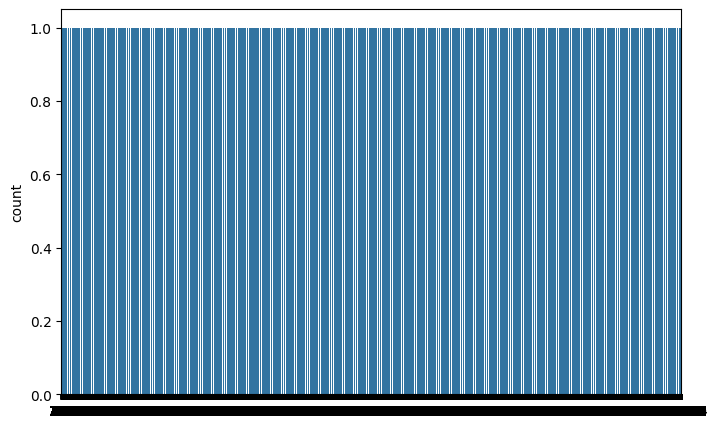

In [106]:
#ETS CALCULATE THE DEFAULT RATE

fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(pd.Series(y),ax=ax)
plt.show()

In [44]:
print(round(((sum(y)/len(y))*100),2),'%')

8.08 %


In [45]:
pip install statsmodels



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


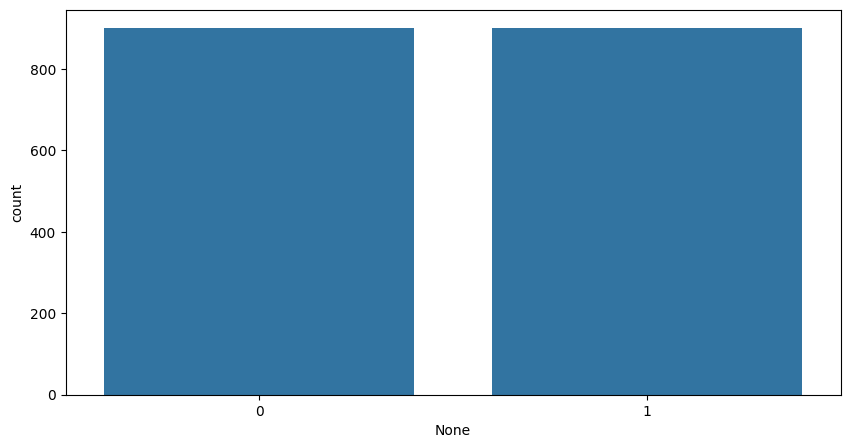

In [110]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Resample the dataset using SMOTE
smote = SMOTE(k_neighbors=5, random_state=42)
x_resam, y_resam = smote.fit_resample(X, y)

# Plot the resampled data
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=pd.Series(y_resam), ax=ax)

plt.show()

Model Building

In [171]:
import statsmodels.api as sm

# Logistic regression model
np.seterr(divide='ignore', invalid='ignore')

logm1 = sm.GLM(y_resam,(sm.add_constant(x_resam)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=Perfe

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:                            GLM   Df Residuals:                       57
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 02 Jun 2024   Deviance:                   2.9393e-09
Time:                        00:42:54   Pearson chi2:                 1.47e-09
No. Iterations:                    27   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -847.1660   6.74e+06     -0.000      1.000   -1.32e+07    1.32e+07
x1           183.8390   6.08e+05      0.000      1.000   -1.19e+06    1.19e+06
x2           -39.9077   5.79e+05   -6.9e-05      1.000   -1.13e+06    1.13e+06
x3           154.0443   8.02e+05      0.000      1.000   -1.57e+06    1.57e+06
x4          -317.1728   6.01e+05     -0.001      1.000   -1.18e+06    1.18e+06
x5           212.6876   6.21e+05      0.000      1.000   -1.22e+06    1.22e+06
x6            76.5557   1.53e+06   5.02e-05      1.000   -2.99e+06    2.99e+06
x7            44.2761   5.36e+05   8.26e-05      1.000   -1.05e+06    1.05e+06
x8           -91.9676   1.41e+06  -6.53e-05      1.000   -2.76e+06    2.76e+06
x9            37.1481   9.21e+05   4.03e-05      1.000    -1.8e+06     1.8e+06
x10          201.8960   3.54e+05      0.001      1.000   -6.95e+05    6.95e+05
x11            3.1770   4.09e+05   7.76e-06      1.000   -8.02e+05    8.03e+05
x12          219.8910   8.29e+05      0.000      1.000   -1.62e+06    1.62e+06
x13          363.4216    1.3e+06      0.000      1.000   -2.55e+06    2.55e+06
x14          -33.1055   8.04e+05  -4.12e-05      1.000   -1.58e+06    1.58e+06
x15          297.0411   4.97e+05      0.001      1.000   -9.73e+05    9.73e+05
x16         -204.9586   7.52e+05     -0.000      1.000   -1.47e+06    1.47e+06
x17         -307.2718   4.12e+05     -0.001      0.999   -8.08e+05    8.07e+05
x18         -400.4058   5.83e+05     -0.001      0.999   -1.14e+06    1.14e+06
x19           26.3635   1.25e+06    2.1e-05      1.000   -2.46e+06    2.46e+06
x20           68.2966   2.27e+05      0.000      1.000   -4.45e+05    4.45e+05
x21           14.7429   6.66e+05   2.21e-05      1.000   -1.31e+06    1.31e+06
x22         -205.6278   6.73e+05     -0.000      1.000   -1.32e+06    1.32e+06
x23          300.1446   4.87e+05      0.001      1.000   -9.54e+05    9.55e+05
x24           51.1437   1.07e+06   4.78e-05      1.000    -2.1e+06     2.1e+06
x25         -228.3833   1.03e+06     -0.000      1.000   -2.02e+06    2.02e+06
x26           91.7203   5.24e+05      0.000      1.000   -1.03e+06    1.03e+06
x27          131.4122   1.01e+06      0.000      1.000   -1.98e+06    1.98e+06
x28          337.8633   5.13e+05      0.001      0.999   -1.01e+06    1.01e+06
x29          112.8564   1.45e+06   7.79e-05      1.000   -2.84e+06    2.84e+06
x30         -461.3412   8.46e+05     -0.001      1.000   -1.66e+06    1.66e+06
x31          451.8213   1.59e+06      0.000      1.000   -3.11e+06    3.11e+06
x32          415.7135   6.92e+05      0.001      1.000   -1.36e+06    1.36e+06
x33          -33.4794   4.39e+05  -7.62e-05      1.000   -8.61e+05    8.61e+05
x34          179.3532   5.34e+05      0.000      1.000   -1.05e+06    1.05e+06
x35         -290.1862   1.63e+06     -0.000      1.000    -3.2e+06    3.19e+06
x3

In [115]:
round(X_df.corr(),1)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,-0.1,-0.1,0.1,-0.0,-0.0,-0.1,-0.0,-0.1,0.1,...,0.1,-0.1,0.1,0.1,-0.0,0.0,-0.2,-0.2,-0.0,0.0
1,-0.1,1.0,0.2,0.2,0.1,-0.1,-0.0,-0.2,0.2,-0.1,...,-0.2,-0.1,-0.1,-0.2,0.1,0.1,0.2,-0.1,-0.0,-0.1
2,-0.1,0.2,1.0,0.0,-0.0,-0.0,-0.0,0.0,0.2,-0.1,...,-0.1,0.0,-0.0,-0.0,-0.0,-0.0,0.1,-0.0,-0.2,-0.2
3,0.1,0.2,0.0,1.0,0.0,-0.1,-0.0,-0.0,-0.0,-0.0,...,0.1,0.1,0.1,-0.0,-0.2,0.1,0.0,-0.0,-0.1,-0.0
4,-0.0,0.1,-0.0,0.0,1.0,-0.0,0.2,0.1,0.0,0.1,...,0.1,0.1,-0.1,-0.0,0.2,-0.1,0.0,-0.1,-0.1,-0.0
5,-0.0,-0.1,-0.0,-0.1,-0.0,1.0,0.1,-0.0,-0.3,-0.1,...,-0.1,-0.0,-0.2,0.0,-0.1,0.1,0.1,-0.1,0.1,-0.2
6,-0.1,-0.0,-0.0,-0.0,0.2,0.1,1.0,-0.2,0.1,0.1,...,-0.1,0.0,0.0,0.1,0.2,-0.1,-0.1,-0.1,-0.0,0.2
7,-0.0,-0.2,0.0,-0.0,0.1,-0.0,-0.2,1.0,-0.1,0.1,...,0.1,-0.1,0.0,0.0,-0.0,0.0,-0.1,0.3,0.2,0.1
8,-0.1,0.2,0.2,-0.0,0.0,-0.3,0.1,-0.1,1.0,0.1,...,-0.0,0.0,0.0,0.0,0.1,-0.0,0.1,0.1,-0.1,0.0
9,0.1,-0.1,-0.1,-0.0,0.1,-0.1,0.1,0.1,0.1,1.0,...,0.1,0.1,0.0,0.1,-0.0,-0.0,-0.0,-0.1,-0.1,0.3


<Axes: >

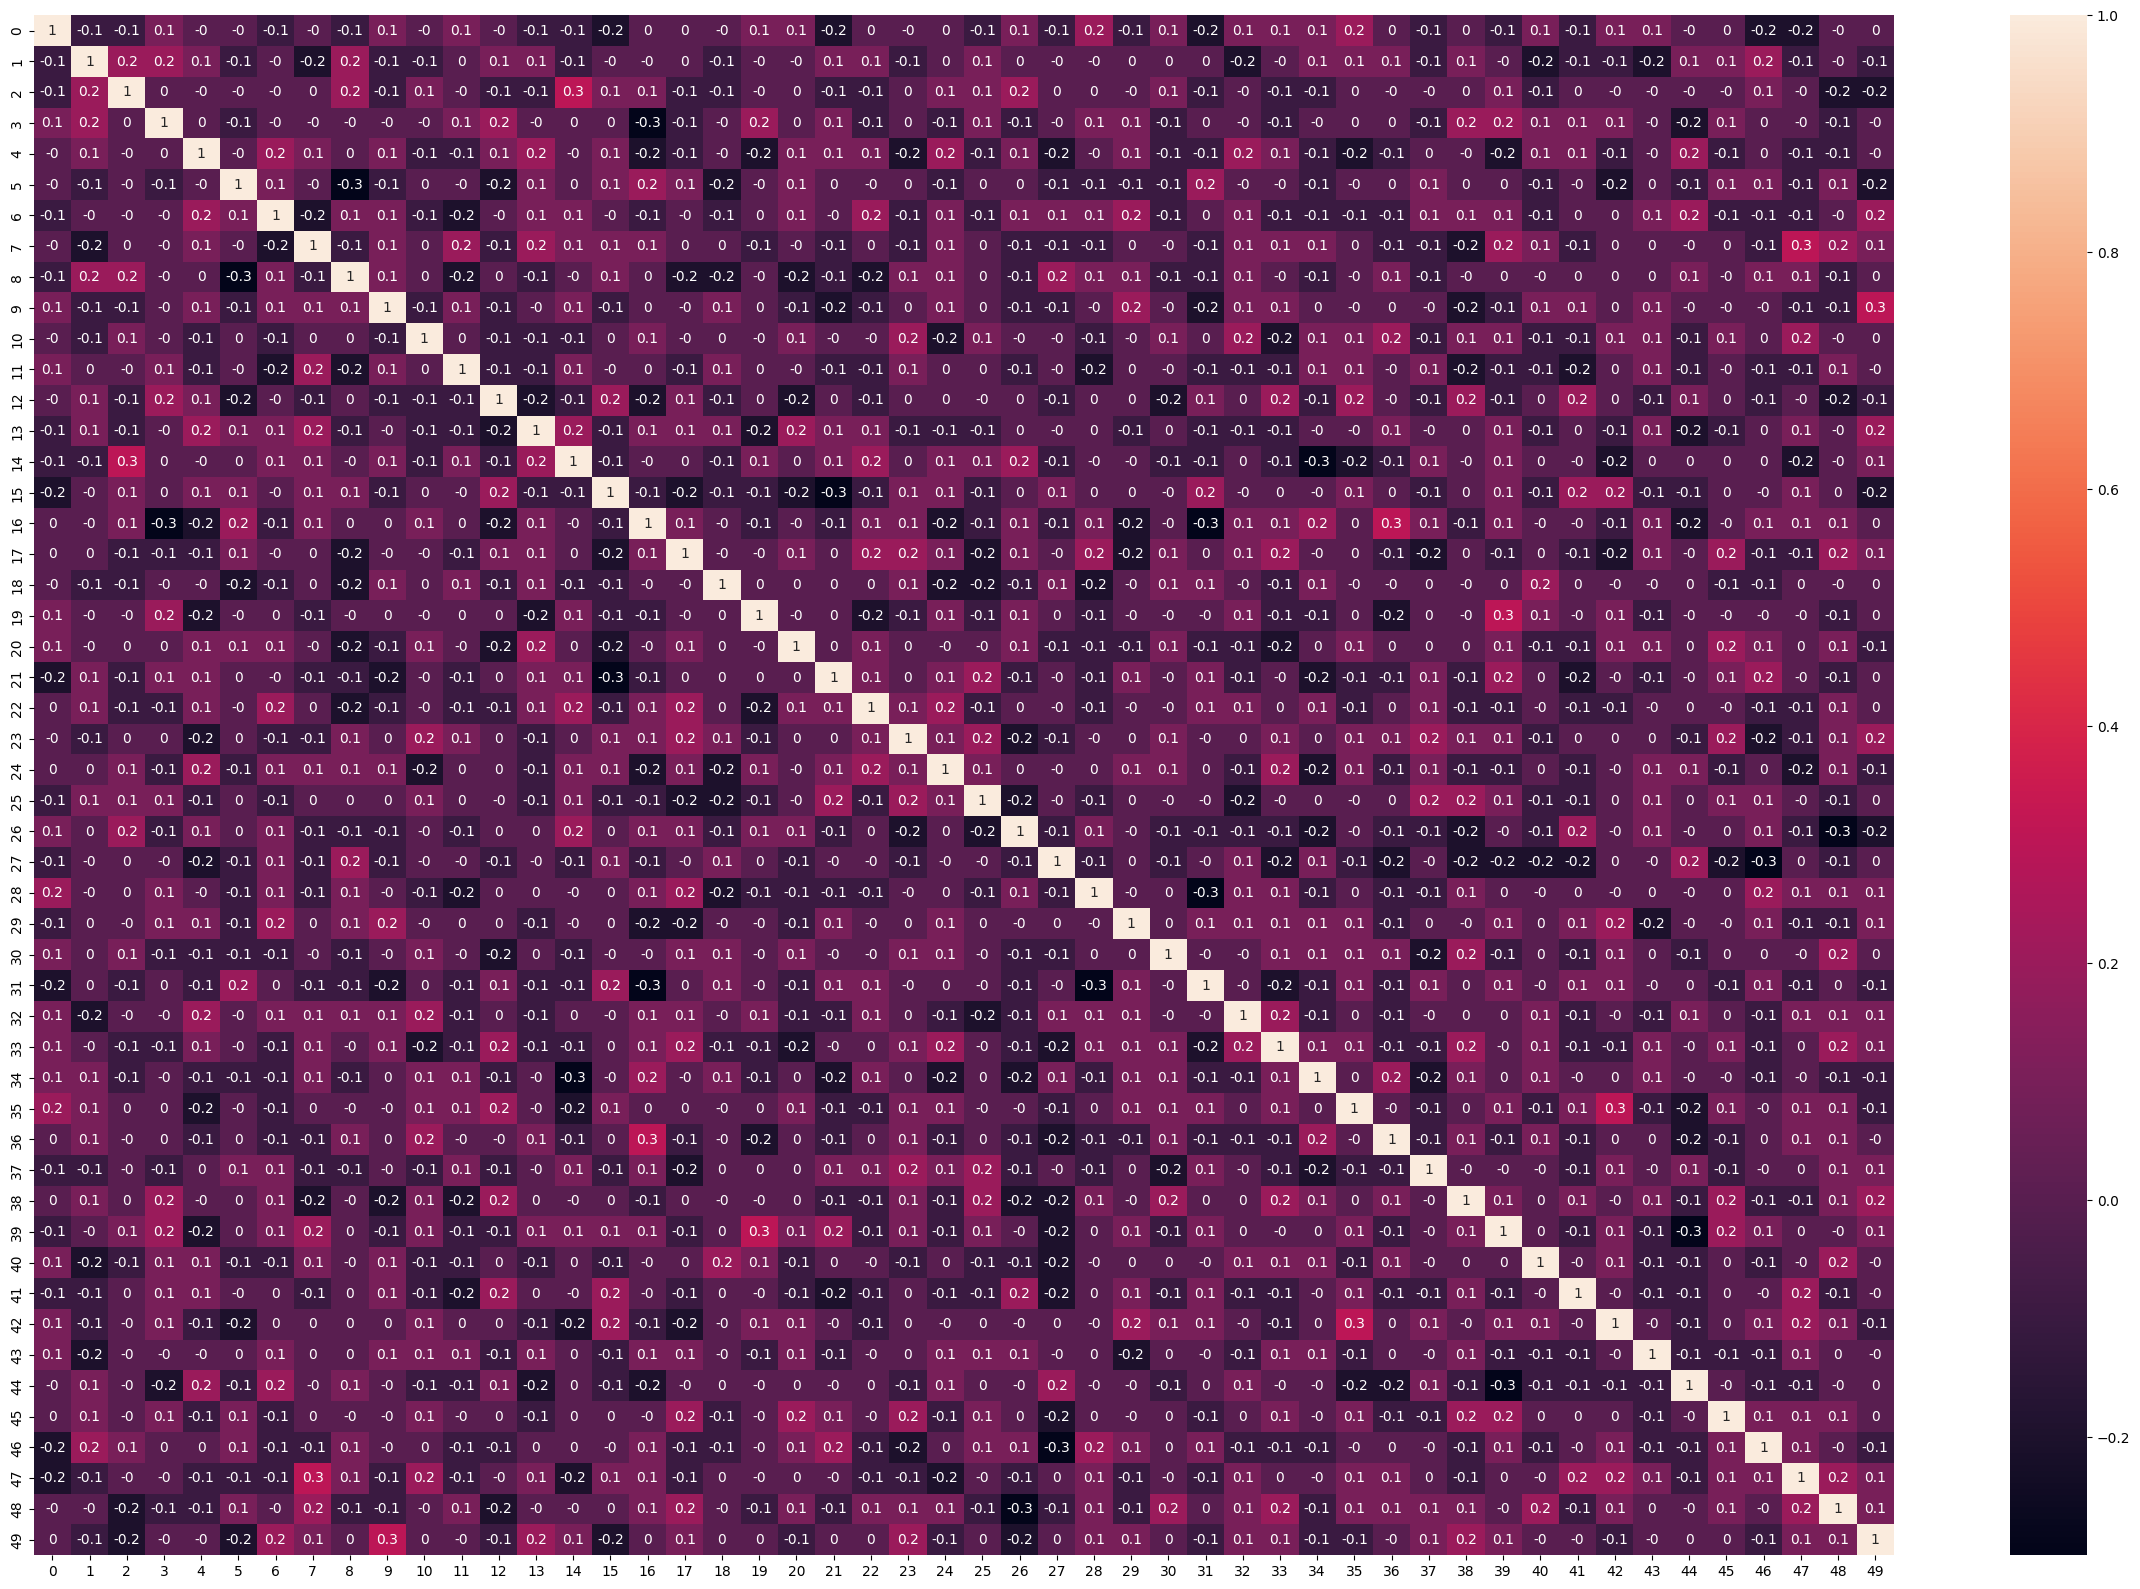

In [89]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(round(X_df.corr(),1),annot = True)

In [117]:

x_resam_df = pd.DataFrame(x_resam)

# Now you can use the drop method
x_resam_df = x_resam_df.drop(['Client_Education_junior secondary', 'Client_Marital_Status_Unknown'], axis=1)

KeyError: "['Client_Education_junior secondary', 'Client_Marital_Status_Unknown'] not found in axis"

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=100000)
rfe = RFE(estimator=logreg, n_features_to_select=30)  # Specify the number of features to select
rfe = rfe.fit(X, y)

print(rfe.support_)  # Printing the boolean results
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [122]:
for i in range(X.shape[1]):
    print("Column: %d, Selected %s, Rank %.3f" % (i,rfe.support_[i],rfe.ranking_[i]))

Column: 0, Selected True, Rank 1.000
Column: 1, Selected True, Rank 1.000
Column: 2, Selected True, Rank 1.000
Column: 3, Selected True, Rank 1.000
Column: 4, Selected True, Rank 1.000
Column: 5, Selected True, Rank 1.000
Column: 6, Selected True, Rank 1.000
Column: 7, Selected True, Rank 1.000
Column: 8, Selected True, Rank 1.000
Column: 9, Selected True, Rank 1.000
Column: 10, Selected True, Rank 1.000
Column: 11, Selected True, Rank 1.000
Column: 12, Selected True, Rank 1.000
Column: 13, Selected True, Rank 1.000
Column: 14, Selected True, Rank 1.000
Column: 15, Selected True, Rank 1.000
Column: 16, Selected True, Rank 1.000
Column: 17, Selected True, Rank 1.000
Column: 18, Selected True, Rank 1.000
Column: 19, Selected True, Rank 1.000


In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Simulating example data (Replace with your actual data)
X, y = np.random.rand(100, 50), np.random.randint(0, 2, 100)

# Initializing the Logistic Regression model
logreg = LogisticRegression(max_iter=100000)

# Running RFE with the logistic regression model to select 30 features
rfe = RFE(logreg, n_features_to_select=30)  # Specify the number of features to select

# Fitting RFE
rfe = rfe.fit(X, y)

# Printing the boolean results indicating selected features
print(rfe.support_)

# Printing the ranking of features
print(rfe.ranking_)


[ True  True False  True False  True  True  True  True  True  True False
  True False  True  True False False False False False False False  True
  True False  True  True False  True False  True  True False  True False
  True  True  True  True  True False  True False  True  True False  True
 False  True]
[ 1  1  6  1  9  1  1  1  1  1  1  5  1  7  1  1 10  4  2 18 11 14 21  1
  1 12  1  1 17  1 20  1  1 13  1 16  1  1  1  1  1 15  1 19  1  1  3  1
  8  1]


In [71]:
for i in range(X.shape[1]):
    print("Column: %d, Selected %s, Rank %.3f" % (i,rfe.support_[i],rfe.ranking_[i]))

Column: 0, Selected True, Rank 1.000
Column: 1, Selected True, Rank 1.000
Column: 2, Selected False, Rank 6.000
Column: 3, Selected True, Rank 1.000
Column: 4, Selected False, Rank 9.000
Column: 5, Selected True, Rank 1.000
Column: 6, Selected True, Rank 1.000
Column: 7, Selected True, Rank 1.000
Column: 8, Selected True, Rank 1.000
Column: 9, Selected True, Rank 1.000
Column: 10, Selected True, Rank 1.000
Column: 11, Selected False, Rank 5.000
Column: 12, Selected True, Rank 1.000
Column: 13, Selected False, Rank 7.000
Column: 14, Selected True, Rank 1.000
Column: 15, Selected True, Rank 1.000
Column: 16, Selected False, Rank 10.000
Column: 17, Selected False, Rank 4.000
Column: 18, Selected False, Rank 2.000
Column: 19, Selected False, Rank 18.000
Column: 20, Selected False, Rank 11.000
Column: 21, Selected False, Rank 14.000
Column: 22, Selected False, Rank 21.000
Column: 23, Selected True, Rank 1.000
Column: 24, Selected True, Rank 1.000
Column: 25, Selected False, Rank 12.000
Colu

In [132]:
col = X_df.columns[rfe.support_]

x_resam2 = x_resam[col]
x_resam2.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_8',
       'feature_9', 'feature_10', 'feature_12', 'feature_14', 'feature_16',
       'feature_17', 'feature_21', 'feature_22', 'feature_24', 'feature_26',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_34', 'feature_35', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_46', 'feature_47', 'feature_49'],
      dtype='object')

In [133]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(max_iter=10000)
logsk.fit(x_resam[col], y_resam)

LogisticRegression(max_iter=10000)

In [134]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_resam,(sm.add_constant(x_resam[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:                            GLM   Df Residuals:                       77
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.877
Date:                Sat, 01 Jun 2024   Deviance:                       63.753
Time:                        13:06:30   Pearson chi2:                     89.8
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5489
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6904      4.730     -1.203      0.229     -14.960       3.579
feature_0      4.3837      1.897      2.311      0.021       0.666       8.101
feature_1     -1.3889      1.440     -0.964      0.335      -4.212       1.434
feature_2      5.3861      2.086      2.582      0.010       1.298       9.474
feature_3     -6.0880      2.484     -2.451      0.014     -10.957      -1.219
feature_8      4.4630      1.745      2.557      0.011       1.042       7.884
feature_9      4.3431      2.454      1.770      0.077      -0.466       9.152
feature_10     1.2090      1.626      0.743      0.457      -1.979       4.397
feature_12     8.9631      2.810      3.190      0.001       3.456      14.470
feature_14     7.8724      2.914      2.702      0.007       2.162      13.583
feature_16    -8.1845      2.559     -3.199      0.001     -13.199      -3.170
feature_17    -6.6766      2.135     -3.128      0.002     -10.861      -2.493
feature_21    -3.1924      1.834     -1.741      0.082      -6.787       0.402
feature_22     4.5718      2.361      1.937      0.053      -0.055       9.199
feature_24    -6.3873      2.673     -2.389      0.017     -11.627      -1.148
feature_26     2.6404      1.649      1.602      0.109      -0.591       5.872
feature_28    -1.4710      1.924     -0.765      0.444      -5.241       2.299
feature_29    -9.5972      3.001     -3.198      0.001     -15.478      -3.716
feature_30     8.2699      2.954      2.800      0.005       2.480      14.060
feature_31     7.3666      3.433      2.146      0.032       0.639      14.094
feature_32     1.2987      1.398      0.929      0.353      -1.441       4.039
feature_34    -6.6427      2.586     -2.569      0.010     -11.711      -1.574
feature_35    -3.3893      1.822     -1.860      0.063      -6.960       0.181
feature_37    -1.6285      1.733     -0.939      0.348      -5.026       1.769
feature_38    -7.2793      2.401     -3.032      0.002     -11.984      -2.574
feature_39    11.0621      3.308      3.344      0.001       4.579      17.545
feature_40    -1.3475      1.447     -0.931      0.352      -4.183       1.488
feature_41    -0.5801      1.776     -0.327      0.744      -4.061       2.901
feature_46    -1.5842      1.725     -0.918      0.358      -4.965       1.796
feature_47     0.1585      1.502      0.106      0.916      -2.785       3.102
feature_49     5.3072      1.999      2.654      0.008       1.388       9.226
==============================================================================
"""

In [136]:
X1=x_resam2[col]

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

# VIF dataframe
def vif_calc(X):
    vif_data = pd.DataFrame()
    vif_data["test_df"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]
    print(vif_data.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False))

In [163]:
vif_calc(X1)

       test_df       VIF
3    feature_3  6.978145
5    feature_9  6.719822
23  feature_38  6.574546
9   feature_16  6.571390
18  feature_31  6.498607
2    feature_2  6.453791
13  feature_24  6.299103
12  feature_22  6.256792
26  feature_41  6.203906
16  feature_29  6.105748
21  feature_35  5.972593
8   feature_14  5.938656
24  feature_39  5.898771
15  feature_28  5.805911
19  feature_32  5.503085
20  feature_34  5.480684
7   feature_12  5.415027
29  feature_49  5.307078
22  feature_37  5.300960
1    feature_1  5.199284
4    feature_8  5.126032
17  feature_30  5.031025
27  feature_46  5.019808
0    feature_0  4.970641
11  feature_21  4.909289
6   feature_10  4.811958
10  feature_17  4.714255
14  feature_26  4.646147
25  feature_40  4.469296
28  feature_47  4.438333


In [146]:
vif_calc(X1)

       feature       VIF
3    feature_3  6.978145
5    feature_9  6.719822
23  feature_38  6.574546
9   feature_16  6.571390
18  feature_31  6.498607
2    feature_2  6.453791
13  feature_24  6.299103
12  feature_22  6.256792
26  feature_41  6.203906
16  feature_29  6.105748
21  feature_35  5.972593
8   feature_14  5.938656
24  feature_39  5.898771
15  feature_28  5.805911
19  feature_32  5.503085
20  feature_34  5.480684
7   feature_12  5.415027
29  feature_49  5.307078
22  feature_37  5.300960
1    feature_1  5.199284
4    feature_8  5.126032
17  feature_30  5.031025
27  feature_46  5.019808
0    feature_0  4.970641
11  feature_21  4.909289
6   feature_10  4.811958
10  feature_17  4.714255
14  feature_26  4.646147
25  feature_40  4.469296
28  feature_47  4.438333


In [165]:
vif_calc(X1)

       test_df       VIF
3    feature_3  6.978145
5    feature_9  6.719822
23  feature_38  6.574546
9   feature_16  6.571390
18  feature_31  6.498607
2    feature_2  6.453791
13  feature_24  6.299103
12  feature_22  6.256792
26  feature_41  6.203906
16  feature_29  6.105748
21  feature_35  5.972593
8   feature_14  5.938656
24  feature_39  5.898771
15  feature_28  5.805911
19  feature_32  5.503085
20  feature_34  5.480684
7   feature_12  5.415027
29  feature_49  5.307078
22  feature_37  5.300960
1    feature_1  5.199284
4    feature_8  5.126032
17  feature_30  5.031025
27  feature_46  5.019808
0    feature_0  4.970641
11  feature_21  4.909289
6   feature_10  4.811958
10  feature_17  4.714255
14  feature_26  4.646147
25  feature_40  4.469296
28  feature_47  4.438333


In [166]:
col = X1.columns
x_resam[col]

,feature_0,feature_1,feature_2,feature_3,feature_8,feature_9,feature_10,feature_12,feature_14,feature_16,...,feature_34,feature_35,feature_37,feature_38,feature_39,feature_40,feature_41,feature_46,feature_47,feature_49
0,0.374540,0.950714,0.731994,0.598658,0.601115,0.708073,0.020584,0.832443,0.181825,0.304242,...,0.965632,0.808397,0.097672,0.684233,0.440152,0.122038,0.495177,0.311711,0.520068,0.184854
1,0.969585,0.775133,0.939499,0.894827,0.045227,0.325330,0.388677,0.828738,0.280935,0.140924,...,0.310982,0.325183,0.637557,0.887213,0.472215,0.119594,0.713245,0.522733,0.427541,0.107891
2,0.031429,0.636410,0.314356,0.508571,0.228798,0.076980,0.289751,0.929698,0.633404,0.803672,...,0.942910,0.323203,0.703019,0.363630,0.971782,0.962447,0.251782,0.609564,0.502679,0.278646
3,0.908266,0.239562,0.144895,0.489453,0.237638,0.728216,0.367783,0.633530,0.090290,0.320780,...,0.257942,0.659984,0.555201,0.529651,0.241852,0.093103,0.897216,0.725956,0.897110,0.779876
4,0.642032,0.084140,0.161629,0.898554,0.005062,0.160808,0.548734,0.651961,0.712179,0.325400,...,0.195243,0.722452,0.024316,0.645472,0.177111,0.940459,0.953929,0.428184,0.966655,0.853009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.893847,0.028703,0.154834,0.887828,0.807729,0.885054,0.697217,0.849269,0.295463,0.265453,...,0.625224,0.933095,0.116478,0.668198,0.655412,0.623960,0.306799,0.702788,0.330509,0.347294
104,0.413571,0.602600,0.633870,0.335434,0.575886,0.266521,0.932217,0.473193,0.499244,0.381215,...,0.562545,0.855497,0.822658,0.733144,0.505849,0.290677,0.164189,0.728664,0.719914,0.427574
105,0.207487,0.455805,0.882670,0.591318,0.195865,0.488884,0.166445,0.933076,0.655027,0.229259,...,0.232134,0.595053,0.557341,0.112053,0.296512,0.630317,0.723726,0.184706,0.223914,0.038918
106,0.619443,0.428559,0.547991,0.184173,0.888425,0.570581,0.561348,0.068487,0.605751,0.906805,...,0.582192,0.016747,0.331355,0.661127,0.547135,0.345796,0.141552,0.114378,0.394684,0.776652


In [167]:
logm5 = sm.GLM(y_resam,(sm.add_constant(x_resam[col])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:                            GLM   Df Residuals:                       77
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.877
Date:                Sun, 02 Jun 2024   Deviance:                       63.753
Time:                        00:30:12   Pearson chi2:                     89.8
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5489
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6904      4.730     -1.203      0.229     -14.960       3.579
feature_0      4.3837      1.897      2.311      0.021       0.666       8.101
feature_1     -1.3889      1.440     -0.964      0.335      -4.212       1.434
feature_2      5.3861      2.086      2.582      0.010       1.298       9.474
feature_3     -6.0880      2.484     -2.451      0.014     -10.957      -1.219
feature_8      4.4630      1.745      2.557      0.011       1.042       7.884
feature_9      4.3431      2.454      1.770      0.077      -0.466       9.152
feature_10     1.2090      1.626      0.743      0.457      -1.979       4.397
feature_12     8.9631      2.810      3.190      0.001       3.456      14.470
feature_14     7.8724      2.914      2.702      0.007       2.162      13.583
feature_16    -8.1845      2.559     -3.199      0.001     -13.199      -3.170
feature_17    -6.6766      2.135     -3.128      0.002     -10.861      -2.493
feature_21    -3.1924      1.834     -1.741      0.082      -6.787       0.402
feature_22     4.5718      2.361      1.937      0.053      -0.055       9.199
feature_24    -6.3873      2.673     -2.389      0.017     -11.627      -1.148
feature_26     2.6404      1.649      1.602      0.109      -0.591       5.872
feature_28    -1.4710      1.924     -0.765      0.444      -5.241       2.299
feature_29    -9.5972      3.001     -3.198      0.001     -15.478      -3.716
feature_30     8.2699      2.954      2.800      0.005       2.480      14.060
feature_31     7.3666      3.433      2.146      0.032       0.639      14.094
feature_32     1.2987      1.398      0.929      0.353      -1.441       4.039
feature_34    -6.6427      2.586     -2.569      0.010     -11.711      -1.574
feature_35    -3.3893      1.822     -1.860      0.063      -6.960       0.181
feature_37    -1.6285      1.733     -0.939      0.348      -5.026       1.769
feature_38    -7.2793      2.401     -3.032      0.002     -11.984      -2.574
feature_39    11.0621      3.308      3.344      0.001       4.579      17.545
feature_40    -1.3475      1.447     -0.931      0.352      -4.183       1.488
feature_41    -0.5801      1.776     -0.327      0.744      -4.061       2.901
feature_46    -1.5842      1.725     -0.918      0.358      -4.965       1.796
feature_47     0.1585      1.502      0.106      0.916      -2.785       3.102
feature_49     5.3072      1.999      2.654      0.008       1.388       9.226
==============================================================================
"""

In [152]:
col = X1.columns

In [153]:
len(col)

30

In [154]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(max_iter=10000)
logsk.fit(x_resam[col], y_resam)

LogisticRegression(max_iter=10000)

Making Predictions!

In [177]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_df[col])

In [178]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [179]:
y_pred_df = y_pred_df.iloc[:,[1]]

In [181]:
y_pred_df= y_pred_df.rename(columns={ 1 : 'Default_Prob'})
y_pred_df['Default'] = y_pred_df.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_df = y_pred_df.drop(columns=['Default_Prob'])


In [182]:
y_test_df = pd.DataFrame(test_df['ID'])

In [183]:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [240]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)
y_pred_final.head()

,ID,Default
0,12202227,0.0
1,12279381,1.0
2,12222714,0.0
3,12265215,0.0
4,12203970,0.0


In [344]:
y_pred_final.to_csv('test_submission.csv',index=False)

In [345]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_resam, y_resam, test_size=0.2)


In [346]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(max_iter=10000)
logsk1.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [347]:
# Predicted probabilities
y_pred1 = logsk1.predict_proba(x_test)

In [348]:
y_pred_df1 = pd.DataFrame(y_pred1)
y_pred_df1 = y_pred_df1.iloc[:,[1]]


y_test_df1 = pd.DataFrame(y_test)
y_test_df1['ID'] = y_test_df1.index
# y_test_df1

In [349]:
y_pred_df1.reset_index(drop=True, inplace=True)
y_test_df1.reset_index(drop=True, inplace=True)

In [350]:
# Appending y_test_df and y_pred_1
y_pred_final1 = pd.concat([y_test_df1,y_pred_df1],axis=1)
y_pred_final1.head()

,0,ID,1
0,1,0,0.570402
1,0,1,0.667285
2,1,2,0.617262
3,0,3,0.887961
4,1,4,0.362276


In [351]:
# Renaming the column 
y_pred_final1= y_pred_final1.rename(columns={ 1 : 'Default_Prob'})
# Rearranging the columns
y_pred_final1.head()

,0,ID,Default_Prob
0,1,0,0.570402
1,0,1,0.667285
2,1,2,0.617262
3,0,3,0.887961
4,1,4,0.362276


In [352]:
y_pred_final1.columns

Index([0, 'ID', 'Default_Prob'], dtype='object')

In [353]:
y_pred_final1 = pd.DataFrame(y_pred_final1[['ID',0,'Default_Prob']])
y_pred_final1.head()

,ID,0,Default_Prob
0,0,1,0.570402
1,1,0,0.667285
2,2,1,0.617262
3,3,0,0.887961
4,4,1,0.362276


In [354]:
y_pred_final1['predicted'] = y_pred_final1.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)

NOTE:
We made predictions based on randomly choosing Probabality cut-off at 0.5.
We should mthematically define the cut-off for the predictions as there are chance that we might wrongly predict classes based on probablity.
Hence, it is important to split the labelled data(train dataset) in train-test for model evaluation. Since we dont have target variable - Default in test data, we will split train dataset in train and validate and make predictions on validate data and evelaute the model performance. We will then make predictions on test data.
Splitting Data into Training and Validate Sets

In [355]:
from sklearn import metrics
# help(metrics.confusion_matrix)


In [356]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final1[0], y_pred_final1.predicted )
confusion

array([[6, 5],
       [7, 4]], dtype=int64)

In [357]:
print(len(y_pred_final1[0]))
print(len(y_pred))


22
100


In [359]:
metrics.accuracy_score( y_pred_final1[0], y_pred_final1.predicted)

0.45454545454545453

In [360]:
metrics.f1_score( y_pred_final1[0], y_pred_final1.predicted)

0.39999999999999997

In [361]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [362]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.46153846153846156

In [363]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.5555555555555556


In [364]:
# positive predictive value 
print (TP / float(TP+FP))

0.5454545454545454


In [365]:
# Negative predictive value
print (TN / float(TN+ FN))

0.36363636363636365


ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [366]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [368]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final1[i]= y_pred_final1.Default_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final1.head()

,ID,0,Default_Prob,predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1,0.570402,1,1,1,1,1,1,0,0,0,0
1,1,1,0.667285,1,1,1,1,1,1,1,0,0,0
2,2,1,0.617262,1,1,1,1,1,1,1,0,0,0
3,3,1,0.887961,1,1,1,1,1,1,1,1,1,0
4,4,1,0.362276,0,1,1,1,0,0,0,0,0,0


In [369]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Example DataFrame with true labels and predicted probabilities
data = {
    'true_labels': [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0],
    'pred_prob': [0.9, 0.1, 0.8, 0.7, 0.2, 0.3, 0.9, 0.4, 0.8, 0.1, 0.7, 0.6, 0.2, 0.3, 0.9, 0.4, 0.8, 0.7, 0.1, 0.9, 0.2, 0.3]
}
y_pred_final1 = pd.DataFrame(data)

# Initialize DataFrame for storing results
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

# Define probability thresholds
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Calculate metrics for each cutoff
for i in num:
    # Convert probabilities to binary predictions based on the cutoff
    y_pred_cutoff = (y_pred_final1['pred_prob'] >= i).astype(int)
    
    # Compute confusion matrix
    cm1 = confusion_matrix(y_pred_final1['true_labels'], y_pred_cutoff)
    
    # Check if the confusion matrix is 2x2
    if cm1.shape == (2, 2):
        # Calculate total samples
        total1 = cm1.sum()
        
        # Calculate accuracy, sensitivity, and specificity
        accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
        sensi = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1]) if (cm1[0, 0] + cm1[0, 1]) > 0 else 0
        speci = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1]) if (cm1[1, 0] + cm1[1, 1]) > 0 else 0
        
        # Store the results in the DataFrame
        cutoff_df.loc[i] = [i, accuracy, sensi, speci]
    else:
        print(f"Skipping threshold {i} due to confusion matrix shape {cm1.shape}")

# Print the DataFrame with the results
print(cutoff_df)


     prob  accuracy     sensi  speci
0.0   0.0  0.454545  0.000000    1.0
0.1   0.1  0.454545  0.000000    1.0
0.2   0.2  0.409091  0.083333    0.8
0.3   0.3  0.363636  0.166667    0.6
0.4   0.4  0.409091  0.333333    0.5
0.5   0.5  0.409091  0.416667    0.4
0.6   0.6  0.409091  0.416667    0.4
0.7   0.7  0.454545  0.500000    0.4
0.8   0.8  0.500000  0.666667    0.3
0.9   0.9  0.454545  0.750000    0.1


<Axes: xlabel='prob'>

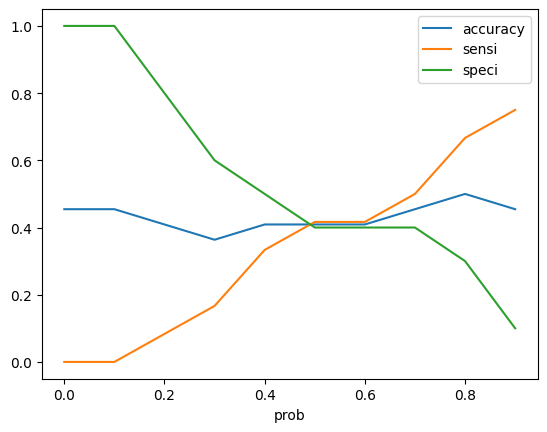

In [370]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

From the curve above, 0.5 is the optimum point to take it as a cutoff probability.